# Solving Regression Problem Using Artificial Neural Networking

In [59]:
from google.colab import drive
import os
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
os.chdir('/content/drive/MyDrive/AIconsulting/RegByANN/')

In [61]:
os.getcwd()

'/content/drive/MyDrive/AIconsulting/RegByANN'

In [62]:
# importing Libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [63]:
housing = fetch_california_housing()

In [64]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [65]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [66]:
X = pd.DataFrame(housing.data,columns=housing.feature_names)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [67]:
y = pd.DataFrame(housing.target,columns=['target'])
y.head()

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [68]:
X.shape

(20640, 8)

In [69]:
y.shape

(20640, 1)

In [70]:
X_train_full,X_test,y_train_full,y_test = train_test_split(X,y , random_state=42)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full , random_state=42)


In [71]:
print(X_train_full.shape)
print(y_train_full.shape)
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(15480, 8)
(15480, 1)
(11610, 8)
(11610, 1)
(3870, 8)
(3870, 1)


In [72]:
X_train.shape[1:]

(8,)

In [73]:
# Creating Layers Of ANN
LAYERS=[tf.keras.layers.Dense(30,activation='relu',input_shape=X_train.shape[1:],name="inputLayer"),

    tf.keras.layers.Dense(10,activation='relu',name="hiddenLayer1"),
    tf.keras.layers.Dense(5,activation='relu',name="hiddenLayer2"),
    tf.keras.layers.Dense(1,name="outputLayer")]
model=tf.keras.models.Sequential(LAYERS)

In [74]:
model.layers

In [75]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Dense)          (None, 30)                270       
                                                                 
 hiddenLayer1 (Dense)        (None, 10)                310       
                                                                 
 hiddenLayer2 (Dense)        (None, 5)                 55        
                                                                 
 outputLayer (Dense)         (None, 1)                 6         
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 641 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [76]:
LOSS_FUNCTION = "mse"
OPTIMIZER = "sgd"

model.compile(loss=LOSS_FUNCTION ,optimizer=OPTIMIZER)

In [77]:
scaler = StandardScaler()

X_train= scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

In [78]:
# Training
EPOCHS = 20
VALIDATION_SET = (X_valid,y_valid)
history = model.fit(X_train, y_train, epochs=EPOCHS ,validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 0.9698 - val_loss: 0.5813
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4675 - val_loss: 0.6171
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4087 - val_loss: 0.3745
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3859 - val_loss: 0.4555
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3736 - val_loss: 0.3955
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3665 - val_loss: 0.4482
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3611 - val_loss: 0.3445
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3567 - val_loss: 0.3623
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3526 - val_loss: 0.6622
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3517 - val_loss: 0.3288

In [79]:
pd.DataFrame(history.history)

,loss,val_loss
0,0.969760,0.581293
1,0.467505,0.617100
2,0.408692,0.374456
3,0.385908,0.455531
4,0.373577,0.395464
5,0.366518,0.448235
6,0.361086,0.344454
7,0.356657,0.362286
8,0.352551,0.662152
9,0.351708,0.328848


<Axes: >

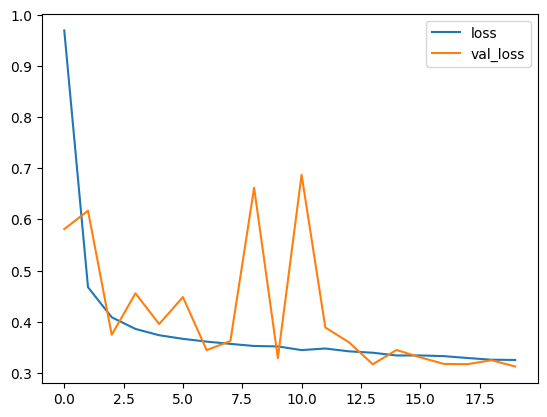

In [80]:
pd.DataFrame(history.history).plot()


In [81]:
model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3278


0.32781997323036194

In [82]:
X_new= X_test[0]

In [83]:
X_new

array([-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
        0.38899735,  0.19374821,  0.2870474 ])

In [84]:
X_test[0]

array([-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
        0.38899735,  0.19374821,  0.2870474 ])

In [85]:
X_new.reshape((1,8)).shape

(1, 8)

In [86]:
model.predict(X_new.reshape((1,8)))

1/1 [==============================] - 0s 64ms/step


array([[0.719378]], dtype=float32)

In [90]:
import tensorflow as tf
drive.mount('/content/drive')

# Define your model architecture (LAYERS is a list of layers you've defined elsewhere)
model_1 = tf.keras.models.Sequential(LAYERS)

# Specify your loss function
LOSS_FUNCTION = 'mse'

# Specify the learning rate (it appears there's a typo in your code; should be 1e-3 for 0.001)
LEARNING_RATE = 1e-3

# Define your optimizer
OPTIMIZER = tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE)

# Compile your model
model_1.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZER)

# Specify the number of training epochs
EPOCHS = 20

# Define ModelCheckpoint callback to save the best model
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('my_keras_model.h5', save_best_only=True)

# Define EarlyStopping callback to stop training early if validation loss doesn't improve
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

# Define TensorBoard callback to log training progress
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir='logs')

# Create a list of callbacks to be used during training
CALLBACKS = [checkpoint_cb, early_stopping_cb, tensorboard_cb]

# Train your model
history = model_1.fit(
    X_train,  # Your training data
    y_train,  # Your training labels
    epochs=EPOCHS,
    validation_data=(X_valid, y_valid),  # Validation data and labels
    callbacks=CALLBACKS  # List of callbacks
)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/20
352/363 [============================>.] - ETA: 0s - loss: 0.3136

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


363/363 [==============================] - 2s 4ms/step - loss: 0.3140 - val_loss: 0.3029
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3139 - val_loss: 0.3031
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3136 - val_loss: 0.3022
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3135 - val_loss: 0.3029
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3132 - val_loss: 0.3033
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3131 - val_loss: 0.3026
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3126 - val_loss: 0.3022
Epoch 8/20
363/363 [==============================] - 2s 4ms/step - loss: 0.3126 - val_loss: 0.3029
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3124 - val_loss: 0.3035
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3122 - val_loss: 0.3027
Epoch 11/2

In [91]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [92]:
%tensorboard --logdir='logs'

Reusing TensorBoard on port 6006 (pid 40090), started 0:10:51 ago. (Use '!kill 40090' to kill it.)

<IPython.core.display.Javascript object>